In [ ]:
# 1. Highest Temperatures are found at the equator. 
#2. Latitude has no correlation on Wind Speed
#3. Cloudiness has no correlation with latitude

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [4]:
print("Starting Weather Check")
print("-----------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

city_name = []
country = []
lat = []
long = []
date = []
temp = []
humidity = []
clouds = []
wind = []
record_counter=0
set_counter=1

for record, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url+city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        if record_counter > 49:
            record_counter = 0
            set_counter = set_counter + 1
       
        else:
            record_counter = record_counter + 1
        
        print(f"Processing Record {record_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City Not Found. Skipping...")
            
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Starting Weather Check
-----------------------
Processing Record 1 of Set 1 : hanzhong
Processing Record 2 of Set 1 : boa vista
Processing Record 3 of Set 1 : onokhoy
Processing Record 4 of Set 1 : hilo
Processing Record 5 of Set 1 : wahpeton
Processing Record 6 of Set 1 : liverpool
Processing Record 7 of Set 1 : lahij
Processing Record 8 of Set 1 : kodiak
Processing Record 9 of Set 1 : hobart
Processing Record 10 of Set 1 : barrow
Processing Record 11 of Set 1 : kanker
Processing Record 12 of Set 1 : ushuaia
City Not Found. Skipping...
Processing Record 13 of Set 1 : coquimbo
Processing Record 14 of Set 1 : port elizabeth
Processing Record 15 of Set 1 : maragogi
Processing Record 16 of Set 1 : mataura
Processing Record 17 of Set 1 : auki
Processing Record 18 of Set 1 : rikitea
Processing Record 19 of Set 1 : katsuura
Processing Record 20 of Set 1 : abha
Processing Record 21 of Set 1 : dingle
Processing Record 22 of Set 1 : vaini
Processing Record 23 of Set 1 : taoudenni
Processing Rec

Processing Record 37 of Set 4 : diebougou
Processing Record 38 of Set 4 : aswan
Processing Record 39 of Set 4 : champerico
City Not Found. Skipping...
Processing Record 40 of Set 4 : bulembu
Processing Record 41 of Set 4 : meulaboh
Processing Record 42 of Set 4 : nyakabindi
Processing Record 43 of Set 4 : gizo
City Not Found. Skipping...
Processing Record 44 of Set 4 : airai
Processing Record 45 of Set 4 : khatanga
Processing Record 46 of Set 4 : natchez
Processing Record 47 of Set 4 : esperance
Processing Record 48 of Set 4 : vao
Processing Record 49 of Set 4 : amahai
Processing Record 50 of Set 4 : burnie
Processing Record 0 of Set 5 : castro
Processing Record 1 of Set 5 : adrar
Processing Record 2 of Set 5 : herat
Processing Record 3 of Set 5 : liwonde
Processing Record 4 of Set 5 : belle fourche
Processing Record 5 of Set 5 : sisimiut
Processing Record 6 of Set 5 : saint anthony
Processing Record 7 of Set 5 : quang ngai
Processing Record 8 of Set 5 : lazurne
Processing Record 9 of 

Processing Record 18 of Set 8 : lokoja
Processing Record 19 of Set 8 : lorengau
Processing Record 20 of Set 8 : paita
Processing Record 21 of Set 8 : biloela
Processing Record 22 of Set 8 : kaeo
Processing Record 23 of Set 8 : flinders
Processing Record 24 of Set 8 : santa rosa
City Not Found. Skipping...
Processing Record 25 of Set 8 : durban
City Not Found. Skipping...
Processing Record 26 of Set 8 : alenquer
Processing Record 27 of Set 8 : atar
Processing Record 28 of Set 8 : yavaros
Processing Record 29 of Set 8 : lavrentiya
Processing Record 30 of Set 8 : takaungu
Processing Record 31 of Set 8 : narsaq
Processing Record 32 of Set 8 : kruisfontein
Processing Record 33 of Set 8 : half moon bay
Processing Record 34 of Set 8 : siilinjarvi
Processing Record 35 of Set 8 : kathu
Processing Record 36 of Set 8 : whitehaven
Processing Record 37 of Set 8 : mount gambier
City Not Found. Skipping...
Processing Record 38 of Set 8 : lazaro cardenas
Processing Record 39 of Set 8 : verkhnyaya toym

In [5]:
city_data = pd.DataFrame({
            "City" : city_name,
            "Lat" : lat,
            "Lng" : long,
            "Max Temp" : temp,
            "Humidity" : humidity,
            "Cloudiness" : clouds,
            "Wind Speed" : wind,
            "Country" : country,
            "Date" : date
})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hanzhong,33.0728,107.0303,35.04,76,94,1.81,CN,1643928566
1,Boa Vista,2.8197,-60.6733,89.58,43,40,5.75,BR,1643928566
2,Onokhoy,51.9320,108.0747,-20.45,99,54,2.75,RU,1643928567
3,Hilo,19.7297,-155.0900,78.53,68,40,9.22,US,1643928314
4,Wahpeton,46.2652,-96.6059,-1.48,71,0,18.41,US,1643928569


In [6]:
city_data.to_csv("output_data/cities.csv", index = False)

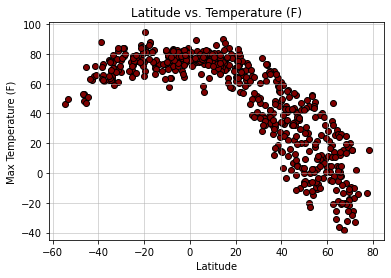

In [11]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], facecolor='maroon', edgecolor = 'black')

plt.title("Latitude vs. Temperature (F)")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature (F)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

plt.savefig("output_data/Images/City Latitude vs Temperature.png")

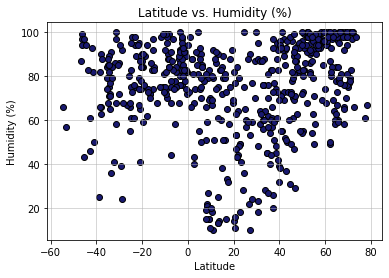

In [12]:
plt.scatter(city_data['Lat'], city_data['Humidity'], facecolor='midnightblue', edgecolor = 'black')

plt.title("Latitude vs. Humidity (%)")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

plt.savefig("output_data/Images/City Latitude vs Humidity.png")


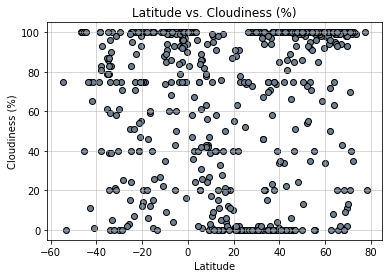

In [13]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], facecolor='slategrey', edgecolor = 'black')

plt.title("Latitude vs. Cloudiness (%)")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

plt.savefig("output_data/Images/City Latitude vs Cloudiness.png")

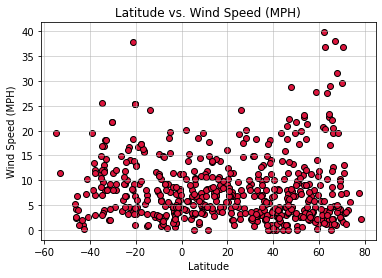

In [14]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], facecolor='crimson', edgecolor = 'black')

plt.title("Latitude vs. Wind Speed (MPH)")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (MPH)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

plt.savefig("output_data/Images/Latitude vs Wind Speed.png")

In [15]:
northern_hemisphere = city_data.loc[city_data["Lat"] >= 0]
southern_hemisphere = city_data.loc[city_data["Lat"] < 0]

The r-squared is: 0.7505113950062762


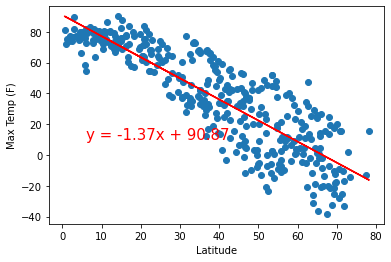

In [16]:

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")


The r-squared is: 0.298395570245798


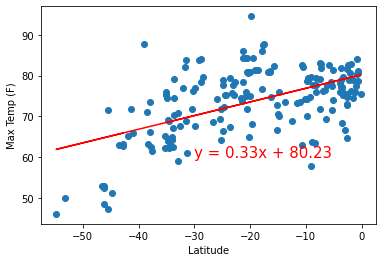

In [17]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.16308392387174983


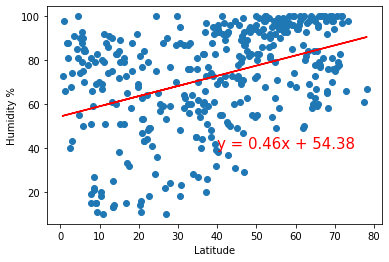

In [18]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.06562591849209606


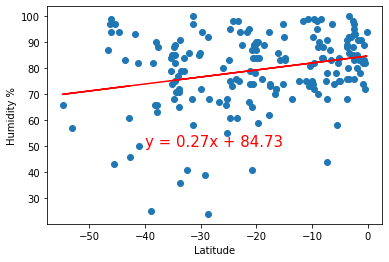

In [19]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.13351648675548483


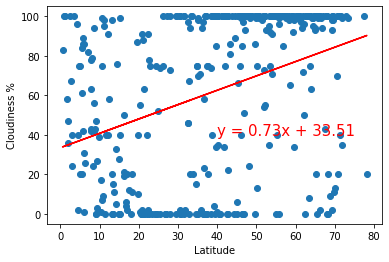

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.0518288585036824


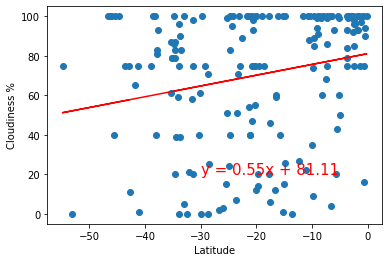

In [21]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.006707781586344321


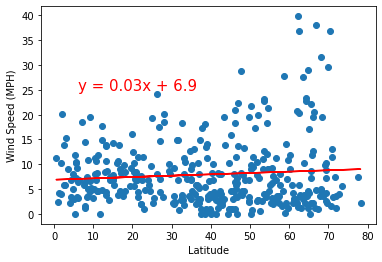

In [22]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.03695679196975689


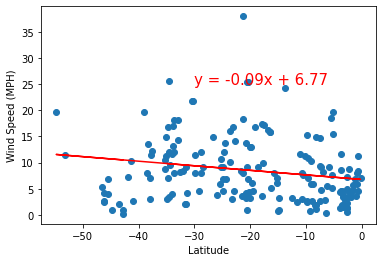

In [23]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")